In [2]:
import numpy as np
from numpy import array, newaxis, expand_dims
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy as copy
import matplotlib.backends.backend_pdf as pdflib
import scipy as sp
import scipy.stats as stats
import math
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict
# plotly.tools.set_credentials_file(username='mhossa10', api_key='CSWpOV3xHUVRzimjfHSB')
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [2]:
color_list1 = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02']
color_list2 = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']
color_list3 = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c']

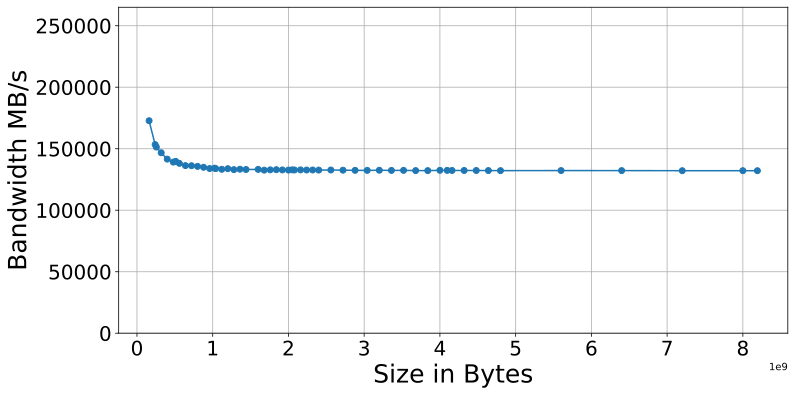

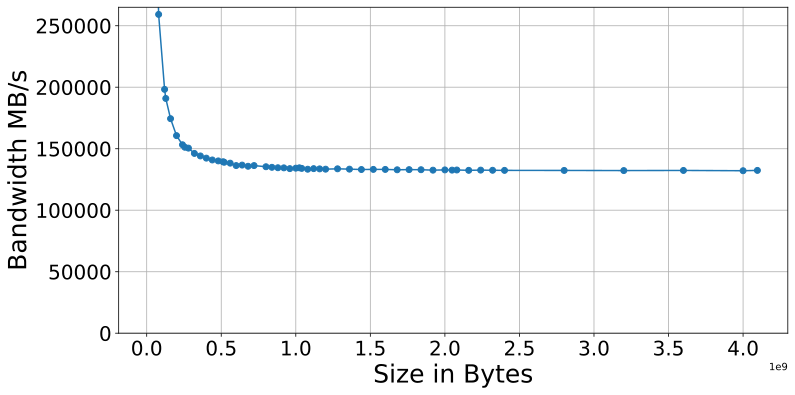

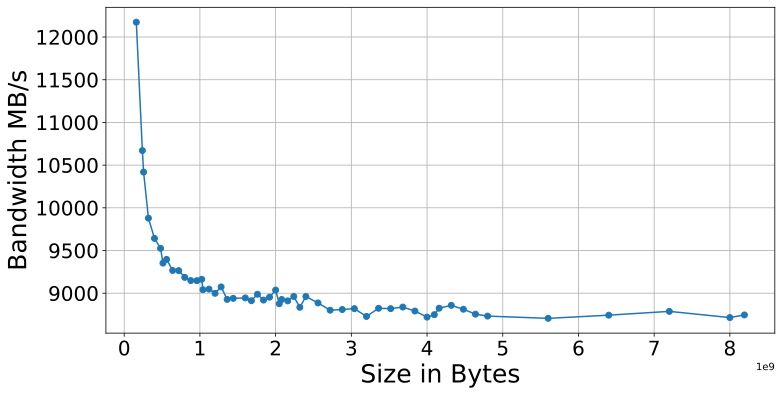

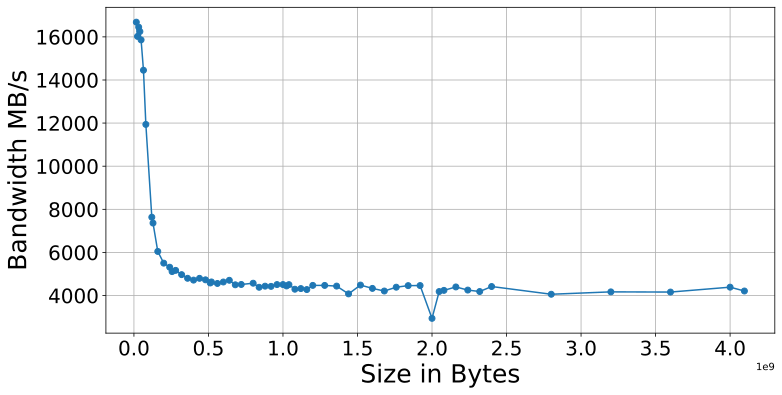

In [3]:
skylake_res = pd.read_csv("../../STREAM/Results/SKYLAKE.csv")
skylake_res = skylake_res[skylake_res["Size"] >= 16000000]
pdf = pdflib.PdfPages("figures/stream/skylake_mpi_copy_double_precision.pdf")
copy_res = skylake_res[(skylake_res["Operation"] == "Copy") & (skylake_res["DataType"] == 8)].sort_values(by="Size").reset_index()
copy_res = copy_res.groupby("Size").mean().reset_index()

fig1,ax1 = plt.subplots()
ax = copy_res.plot(kind="line", ax=ax1, x="Size", y="Bandwidth_MBS", style="-o", legend=False, figsize=(12,6), fontsize=20)
ax.set_ylabel("Bandwidth MB/s", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.grid(True)
ax.set_ylim(0, 265000)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()

pdf = pdflib.PdfPages("figures/stream/skylake_mpi_copy_single_precision.pdf")
copy_res = skylake_res[(skylake_res["Operation"] == "Copy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
copy_res = copy_res.groupby("Size").mean().reset_index()

fig1,ax1 = plt.subplots()
ax = copy_res.plot(kind="line", ax=ax1, x="Size", y="Bandwidth_MBS", style="-o", legend=False, figsize=(12,6), fontsize=20)
ax.set_ylabel("Bandwidth MB/s", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.grid(True)
ax.set_ylim(0, 265000)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()



pdf = pdflib.PdfPages("figures/stream/skylake_mpi_random_copy_double_precision.pdf")
random_copy_res = skylake_res[(skylake_res["Operation"] == "RandomCopy") & (skylake_res["DataType"] == 8)].sort_values(by="Size").reset_index()
random_copy_res = random_copy_res.groupby("Size").mean().reset_index()

fig1,ax1 = plt.subplots()
ax = random_copy_res.plot(kind="line", ax=ax1, x="Size", y="Bandwidth_MBS", style="-o", legend=False, figsize=(12,6), fontsize=20)
ax.set_ylabel("Bandwidth MB/s", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.grid(True)
# ax.set_ylim(0, 265000)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()


pdf = pdflib.PdfPages("figures/stream/skylake_mpi_random_copy_single_precision.pdf")
random_copy_res = skylake_res[(skylake_res["Operation"] == "RandomCopy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
random_copy_res = random_copy_res.groupby("Size").mean().reset_index()

fig1,ax1 = plt.subplots()
ax = random_copy_res.plot(kind="line", ax=ax1, x="Size", y="Bandwidth_MBS", style="-o", legend=False, figsize=(12,6), fontsize=20)
ax.set_ylabel("Bandwidth MB/s", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.grid(True)
# ax.set_ylim(0, 265000)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()



# scal_res = skylake_res[(skylake_res["Operation"] == "Scale") & (skylake_res["DataType"] == 8].sort_values(by="Size").reset_index()
# add_res = skylake_res[(skylake_res["Operation"] == "Add") & (skylake_res["DataType"] == 8].sort_values(by="Size").reset_index()
# triad_res = skylake_res[(skylake_res["Operation"] == "Triad") & (skylake_res["DataType"] == 8].sort_values(by="Size").reset_index()


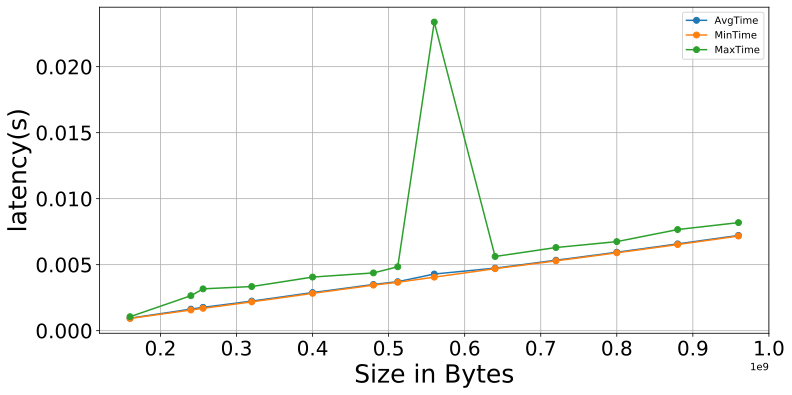

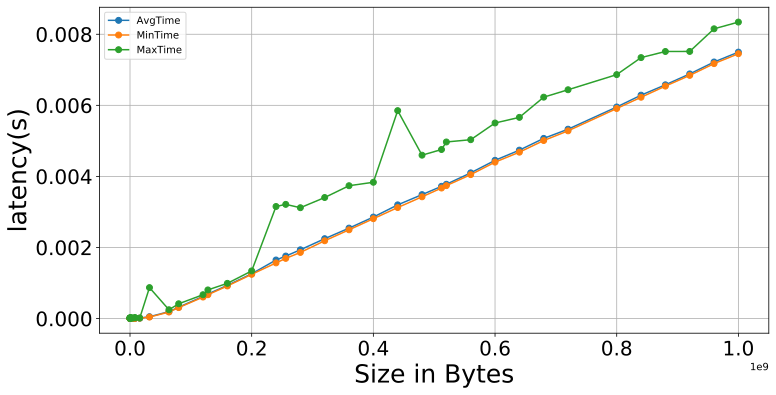

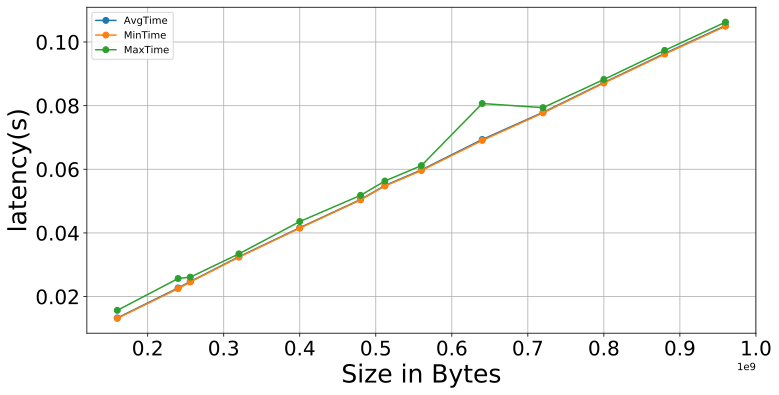

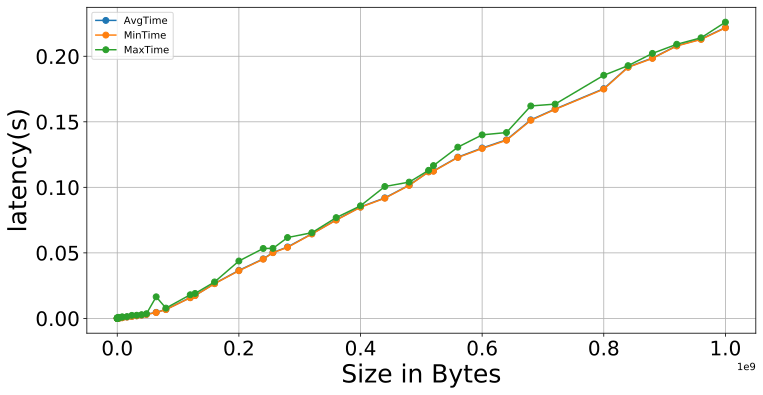

In [4]:
skylake_res = pd.read_csv("../../STREAM/Results/SKYLAKE.csv")
pdf = pdflib.PdfPages("figures/stream/skylake_mpi_copy_double_precision_time.pdf")
copy_res = skylake_res[(skylake_res["Operation"] == "Copy") & (skylake_res["DataType"] == 8)].sort_values(by="Size").reset_index()
copy_res = copy_res[copy_res["Size"] <= 1000000000]
copy_res = copy_res.groupby("Size").mean().reset_index()

fig1,ax1 = plt.subplots()
ax = copy_res.plot(kind="line", ax=ax1, x="Size", y=["AvgTime", "MinTime", "MaxTime"], style="-o", figsize=(12,6), fontsize=20)
ax.set_ylabel("latency(s)", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.grid(True)
# ax.set_ylim(0, 265000)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()


pdf = pdflib.PdfPages("figures/stream/skylake_mpi_copy_single_precision_time.pdf")
copy_res = skylake_res[(skylake_res["Operation"] == "Copy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
copy_res = copy_res[copy_res["Size"] <= 1000000000]
copy_res = copy_res.groupby("Size").mean().reset_index()

fig1,ax1 = plt.subplots()
ax = copy_res.plot(kind="line", ax=ax1, x="Size", y=["AvgTime", "MinTime", "MaxTime"], style="-o", figsize=(12,6), fontsize=20)
ax.set_ylabel("latency(s)", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.grid(True)
# ax.set_ylim(0, 265000)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()


pdf = pdflib.PdfPages("figures/stream/skylake_mpi_random_copy_double_precision_time.pdf")
random_copy_res = skylake_res[(skylake_res["Operation"] == "RandomCopy") & (skylake_res["DataType"] == 8)].sort_values(by="Size").reset_index()
random_copy_res = random_copy_res[random_copy_res["Size"] <= 1000000000]
random_copy_res = random_copy_res.groupby("Size").mean().reset_index()

fig1,ax1 = plt.subplots()
ax = random_copy_res.plot(kind="line", ax=ax1, x="Size", y=["AvgTime", "MinTime", "MaxTime"], style="-o", figsize=(12,6), fontsize=20)
ax.set_ylabel("latency(s)", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.grid(True)
# ax.set_ylim(0, 265000)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()

pdf = pdflib.PdfPages("figures/stream/skylake_mpi_random_copy_single_precision_time.pdf")
random_copy_res = skylake_res[(skylake_res["Operation"] == "RandomCopy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
random_copy_res = random_copy_res[random_copy_res["Size"] <= 1000000000]
random_copy_res = random_copy_res.groupby("Size").mean().reset_index()

fig1,ax1 = plt.subplots()
ax = random_copy_res.plot(kind="line", ax=ax1, x="Size", y=["AvgTime", "MinTime", "MaxTime"], style="-o", figsize=(12,6), fontsize=20)
ax.set_ylabel("latency(s)", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.grid(True)
# ax.set_ylim(0, 265000)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()

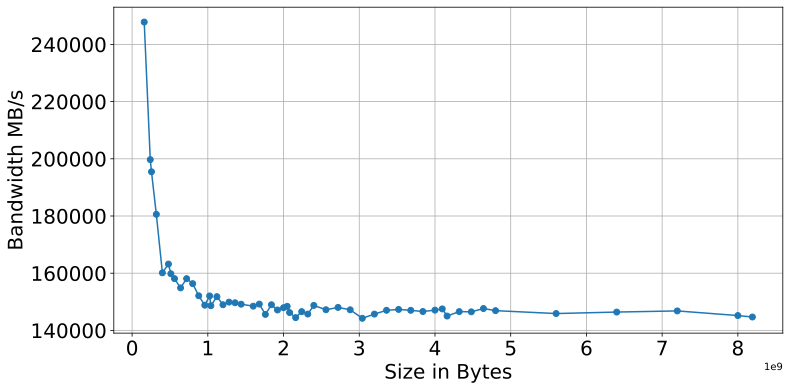

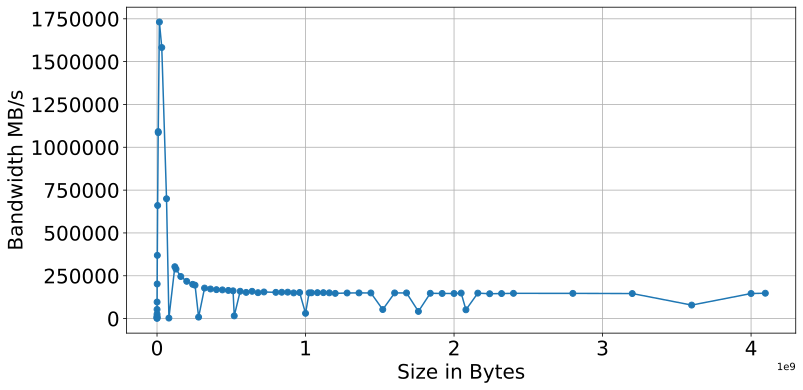

In [5]:
cascade_lake_res = pd.read_csv("../../STREAM/Results/CASCADE_LAKE.csv")
pdf = pdflib.PdfPages("figures/stream/cascade_lake_mpi_copy_double_precision.pdf")
copy_res = cascade_lake_res[(cascade_lake_res["Operation"] == "Copy") & (cascade_lake_res["DataType"] == 8)].sort_values(by="Size").reset_index()
copy_res = copy_res.groupby("Size").mean().reset_index()

fig1,ax1 = plt.subplots()
ax = copy_res.plot(kind="line", ax=ax1, x="Size", y="Bandwidth_MBS", style="-o", legend=False, figsize=(12,6), fontsize=20)
ax.set_ylabel("Bandwidth MB/s", fontsize=20)
ax.set_xlabel("Size in Bytes", fontsize=20)
ax.grid(True)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()


pdf = pdflib.PdfPages("figures/stream/cascade_lake_mpi_copy_single_precision.pdf")
copy_res = cascade_lake_res[(cascade_lake_res["Operation"] == "Copy") & (cascade_lake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
copy_res = copy_res.groupby("Size").mean().reset_index()

fig1,ax1 = plt.subplots()
ax = copy_res.plot(kind="line", ax=ax1, x="Size", y="Bandwidth_MBS", style="-o", legend=False, figsize=(12,6), fontsize=20)
ax.set_ylabel("Bandwidth MB/s", fontsize=20)
ax.set_xlabel("Size in Bytes", fontsize=20)
ax.grid(True)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()


# scal_res = cascade_lake_res[(cascade_lake_res["Operation"] == "Scale") & (cascade_lake_res["DataType"] == 8].sort_values(by="Size").reset_index()
# add_res = cascade_lake_res[(cascade_lake_res["Operation"] == "Add") & (cascade_lake_res["DataType"] == 8].sort_values(by="Size").reset_index()
# triad_res = cascade_lake_res[(cascade_lake_res["Operation"] == "Triad") & (cascade_lake_res["DataType"] == 8].sort_values(by="Size").reset_index()


# OSU Benchmark

# Cascade Lake

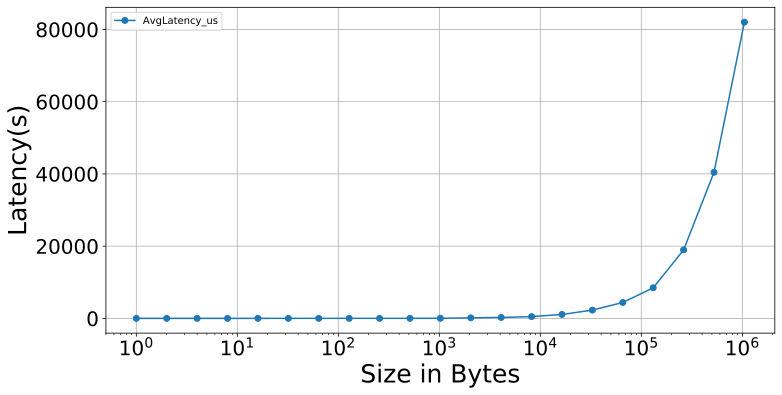

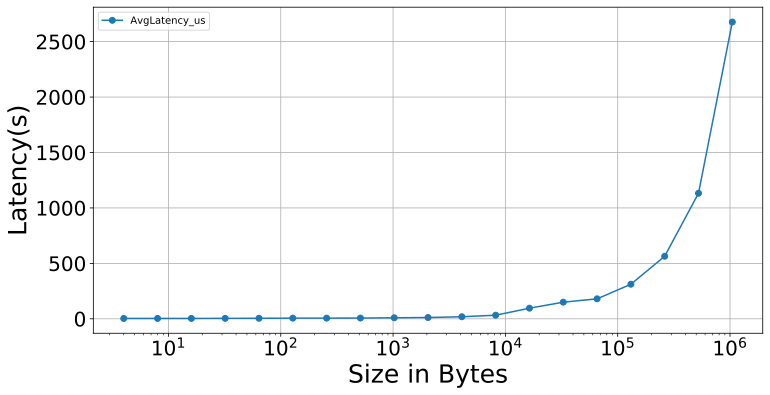

In [6]:
seq_bandwidth = pd.read_csv("../../SpMVMicroBenchmark/mpi/Results/cascade_allgatherv.csv")
seq_bandwidth = seq_bandwidth.groupby("Size").mean().reset_index()

pdf = pdflib.PdfPages("figures/osu/cascade_lake_mpi_allgatherv.pdf")
fig1,ax1 = plt.subplots()
ax = seq_bandwidth.plot(kind="line", ax=ax1, x="Size", y="AvgLatency_us", figsize=(12,6), fontsize=20, style="-o", logx=True)
ax.set_ylabel("Latency(s)", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.grid(True)
# ax.set_ylim(0, 265000)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()


pdf = pdflib.PdfPages("figures/osu/cascade_lake_mpi_allreduce.pdf")
fig1,ax1 = plt.subplots()
seq_bandwidth = pd.read_csv("../../SpMVMicroBenchmark/mpi/Results/cascade_allreduce.csv")
seq_bandwidth = seq_bandwidth.groupby("Size").mean().reset_index()
ax = seq_bandwidth.plot(kind="line", ax=ax1, x="Size", y="AvgLatency_us", figsize=(12,6), fontsize=20, style="-o", logx=True)
ax.set_ylabel("Latency(s)", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.grid(True)
# ax.set_ylim(0, 265000)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()

# Skylake

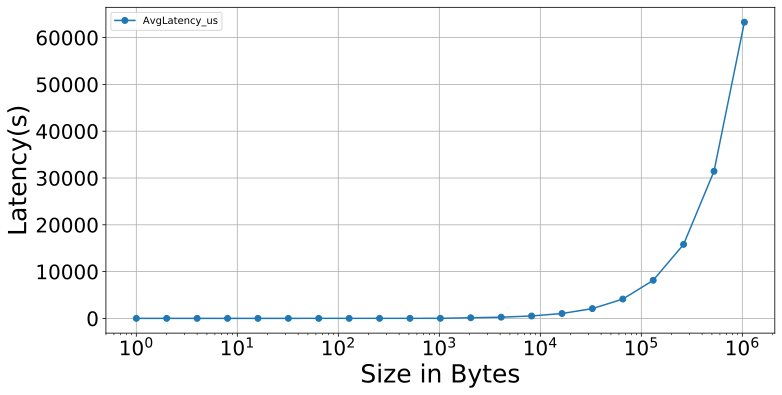

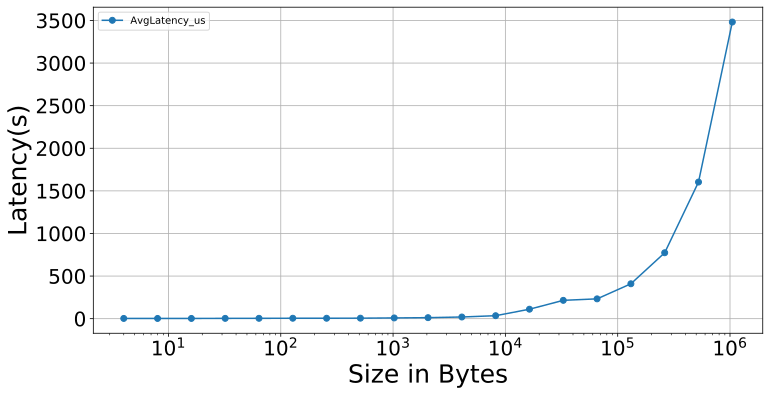

In [7]:
seq_bandwidth = pd.read_csv("../../SpMVMicroBenchmark/mpi/Results/skylake_allgatherv.csv")
seq_bandwidth = seq_bandwidth.groupby("Size").mean().reset_index()

pdf = pdflib.PdfPages("figures/osu/skylake_mpi_allgatherv.pdf")
fig1,ax1 = plt.subplots()
ax = seq_bandwidth.plot(kind="line", ax=ax1, x="Size", y="AvgLatency_us", figsize=(12,6), fontsize=20, style="-o", logx=True)
ax.set_ylabel("Latency(s)", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.grid(True)
# ax.set_ylim(0, 265000)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()


pdf = pdflib.PdfPages("figures/osu/skylake_mpi_allreduce.pdf")
fig1,ax1 = plt.subplots()
seq_bandwidth = pd.read_csv("../../SpMVMicroBenchmark/mpi/Results/skylake_allreduce.csv")
seq_bandwidth = seq_bandwidth.groupby("Size").mean().reset_index()
ax = seq_bandwidth.plot(kind="line", ax=ax1, x="Size", y="AvgLatency_us", figsize=(12,6), fontsize=20, style="-o", logx=True)
ax.set_ylabel("Latency(s)", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.grid(True)
# ax.set_ylim(0, 265000)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()

In [8]:
seq_bandwidth

,Size,AvgLatency_us
0,4,2.87
1,8,2.69
2,16,2.72
3,32,3.68
4,64,4.29
5,128,5.09
6,256,5.02
7,512,5.92
8,1024,8.73
9,2048,11.91


# FMA FLOPS

# MPI

42.83539999999999
85.66865000000001


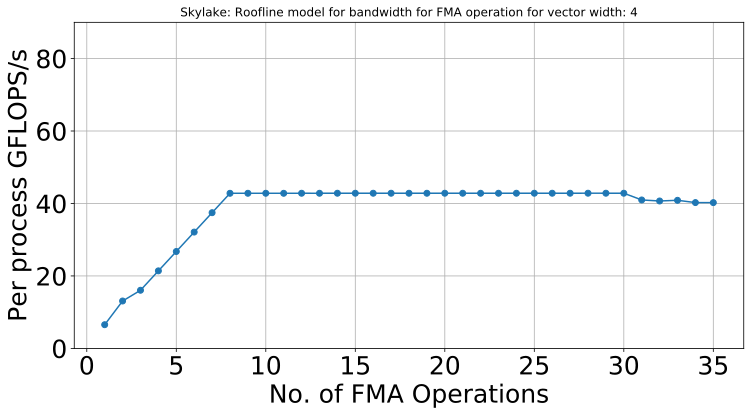

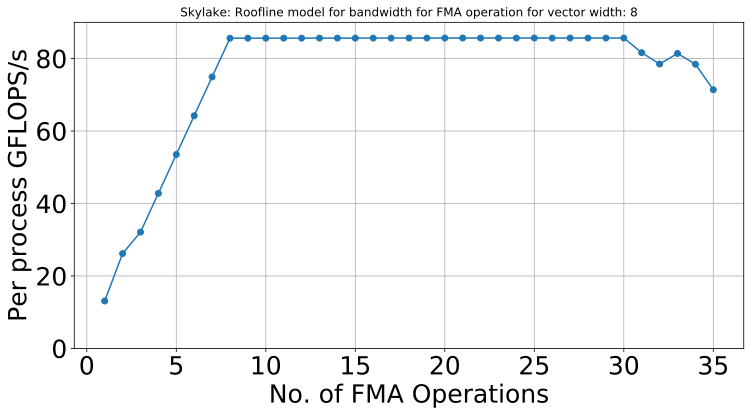

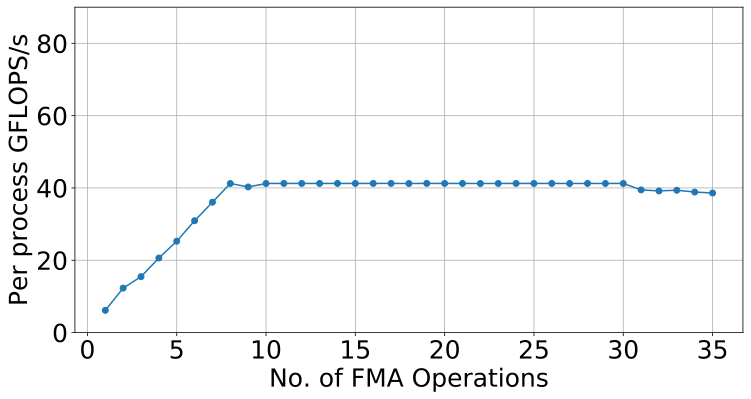

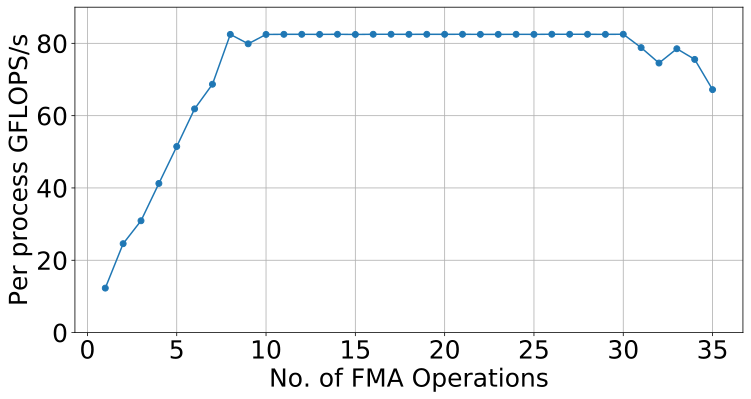

In [9]:
fmaRes = pd.read_csv("../../SpMVMicroBenchmark/mpi/Results/FMA_ON_SKYLAKE.csv")
fmaRes = fmaRes.groupby(["ChainedFMAs", "VectorWidth"]).mean().reset_index()
for vec,vec_data in fmaRes.groupby("VectorWidth"):
    pdf = pdflib.PdfPages("figures/fma/skylake_mpi_fma_roofline_model_for_vec_" + str(vec) + ".pdf")
    fig1,ax1 = plt.subplots()
    vec_data = vec_data.sort_values(by="ChainedFMAs").reset_index(drop=True)
    ax = vec_data.plot(kind="line", style="-o", ax=ax1, x="ChainedFMAs", legend=False, y="AvgGFLOPSPerSec", figsize=(12,6))
    ax.grid(True)
    ax.set_ylim(0,90)
    ax.set_ylabel("Per process GFLOPS/s", fontsize=25)
    ax.set_xlabel("No. of FMA Operations", fontsize=25)
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    ax.set_title("Skylake: Roofline model for bandwidth for FMA operation for vector width: " + str(vec))
    pdf.savefig(fig1, bbox_inches = 'tight')
    pdf.close()
    print(max(vec_data["AvgGFLOPSPerSec"]))
    
fmaRes = pd.read_csv("../../SpMVMicroBenchmark/mpi/Results/FMA_ON_CASCADE_LAKE.csv")
fmaRes = fmaRes.groupby(["ChainedFMAs", "VectorWidth"]).mean().reset_index()
for vec,vec_data in fmaRes.groupby("VectorWidth"):
    pdf = pdflib.PdfPages("figures/fma/cascade_lake_mpi_fma_roofline_model_for_vec_" + str(vec) + ".pdf")
    fig2,ax2 = plt.subplots()
    vec_data = vec_data.sort_values(by="ChainedFMAs").reset_index(drop=True)
    ax = vec_data.plot(kind="line", style="-o", ax=ax2, x="ChainedFMAs", legend=False, y="AvgGFLOPSPerSec", figsize=(12,6))
    ax.grid(True)
    ax.set_ylim(0,90)
    ax.set_ylabel("Per process GFLOPS/s", fontsize=25)
    ax.set_xlabel("No. of FMA Operations", fontsize=25)
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
#     ax.set_title("Cascade Lake: Roofline model for bandwidth for FMA operation for vector width: " + str(vec))
    pdf.savefig(fig2, bbox_inches = 'tight')
    pdf.close()
    
    

# OpenMP

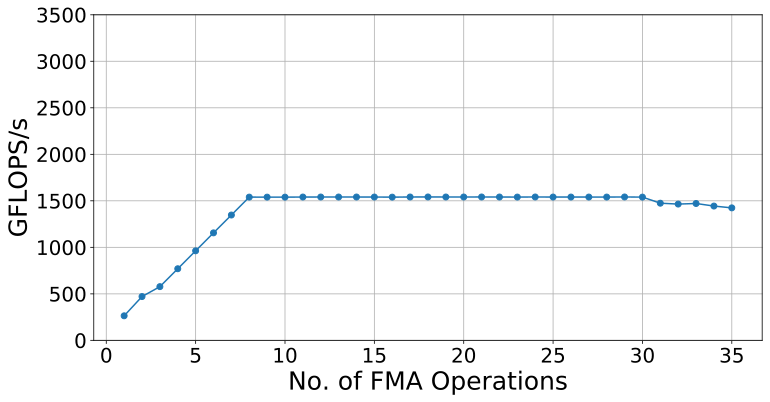

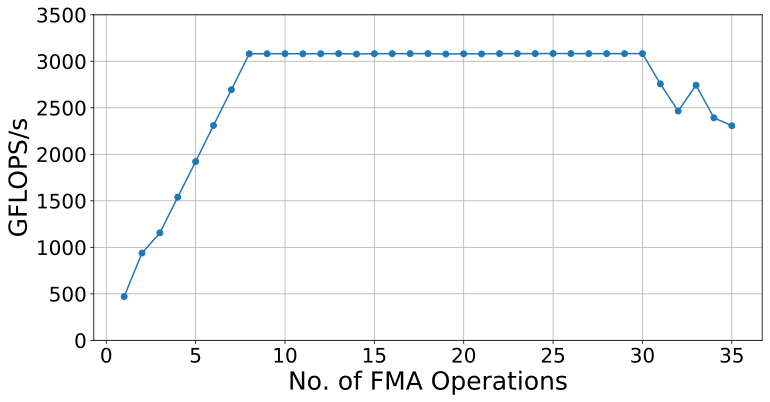

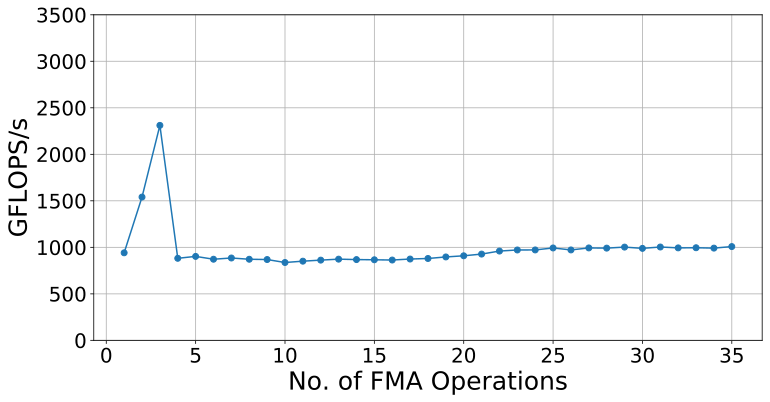

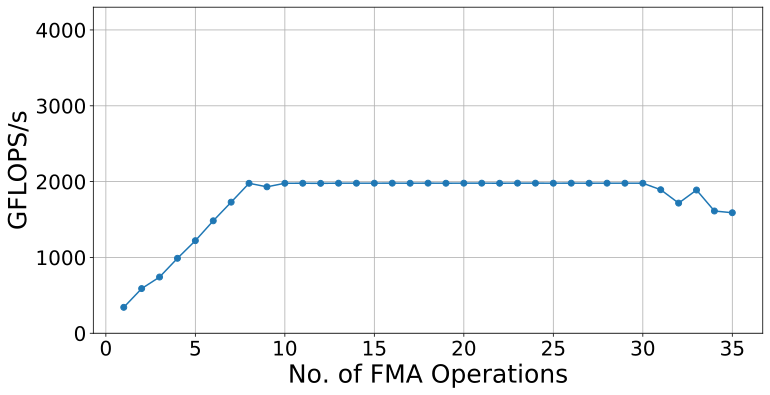

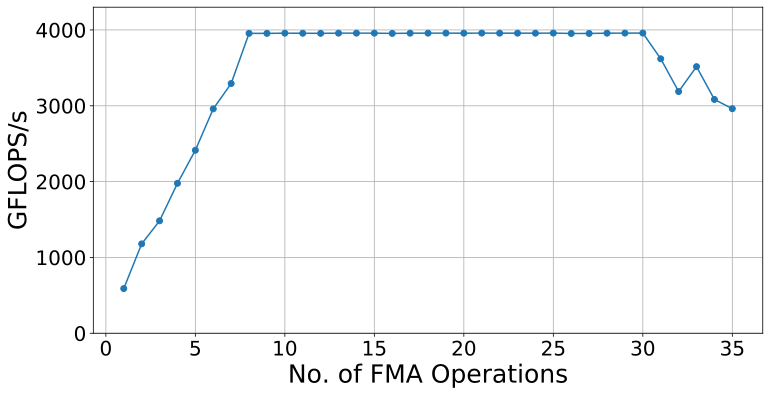

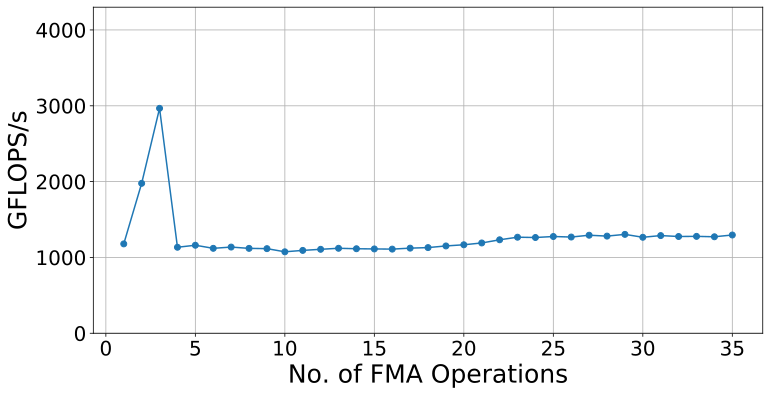

In [10]:
fmaRes = pd.read_csv("../../SpMVMicroBenchmark/omp/Results/FMA_ON_SKYLAKE.csv")
fmaRes = fmaRes.groupby(["ChainedFMAs", "VectorWidth"]).mean().reset_index()

for vec,vec_data in fmaRes.groupby("VectorWidth"):
    pdf = pdflib.PdfPages("figures/fma/skylake_omp_fma_roofline_model_for_vec_" + str(vec) + ".pdf")
    fig1,ax1 = plt.subplots()
    vec_data = vec_data.sort_values(by="ChainedFMAs").reset_index(drop=True)
    ax = vec_data.plot(kind="line", ax=ax1, style="-o", x="ChainedFMAs", legend=False, y="GFLOPSPerSec", figsize=(12,6))
    ax.grid(True)
    ax.set_ylim(0,3500)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_ylabel("GFLOPS/s", fontsize=25)
    ax.set_xlabel("No. of FMA Operations", fontsize=25)
#     ax.set_title("Skylake: Roofline model for bandwidth for FMA operation for vector width: " + str(vec))
    pdf.savefig(fig1, bbox_inches = 'tight')
    pdf.close()

fmaRes = pd.read_csv("../../SpMVMicroBenchmark/omp/Results/FMA_ON_CASCADE_LAKE.csv")
fmaRes = fmaRes.groupby(["ChainedFMAs", "VectorWidth"]).mean().reset_index()
for vec,vec_data in fmaRes.groupby("VectorWidth"):
    pdf = pdflib.PdfPages("figures/fma/cascade_lake_omp_fma_roofline_model_for_vec_" + str(vec) + ".pdf")
    fig2,ax2 = plt.subplots()
    vec_data = vec_data.sort_values(by="ChainedFMAs").reset_index(drop=True)
    ax = vec_data.plot(kind="line", style="-o", ax=ax2, x="ChainedFMAs", legend=False, y="GFLOPSPerSec", figsize=(12,6))
    ax.grid(True)
    ax.set_ylim(0,4300)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_ylabel("GFLOPS/s", fontsize=25)
    ax.set_xlabel("No. of FMA Operations", fontsize=25)
#     ax.set_title("Cascade Lake: Roofline model for bandwidth for FMA operation for vector width: " + str(vec))
    
    pdf.savefig(fig2, bbox_inches = 'tight')
    pdf.close()
    

# Build-Up SpMV Model

# Metrices

In [5]:
test_matrices = [
#     "delaunay_n20"
#     , "NACA0015"
#     , "belgium"
     "AS365"
#     , "roadNet-TX"
    , "road_central"
    , "NLR"
    , "hugetrace-00010"
#     , "nlpkkt200"
#     , "nlpkkt240"
#     , "nlpkkt160"
    , "uk2002"
    , "uk-2002"
    , "333SP"
    , "M6"
#     , "af_shell10" 
#     , "cage15" 
#     , "in-2004" 
#     , "kkt_power" 
    , "road_usa"
    
#     , "asia" 
#     , "aumikw1" 
#     , "com-lj" 
#     , "delaunay_n21" 
#     , "delaunay_n22" 
#     , "delaunay_n23" 
#     , "delaunay_n24" 
#     , "europe" 
#     , "germany" 
#     , "great-britain" 
#     , "hugebubbles-00000" 
#     , "hugebubbles-00010" 
#     , "hugebubbles-00020" 
#     , "hugetrace-00000" 
#     , "hugetrace-00020" 
#     , "hugetric-00000" 
#     , "hugetric-00020" 
#     , "italy" 
#     , "ldoor"
]

random_test_matrices = [
#     "delaunay_n20_random"
#     , "NACA0015_random"
#     , "belgium_random"
     "AS365_random"
    , "roadNet-TX_random"
    , "road_central_random"
    , "NLR_random"
    , "hugetrace-00010_random"
#     , "nlpkkt200_random"
#     , "nlpkkt240_random"
#     , "nlpkkt160_random"
    , "uk2002_random"
    , "uk-2002_random"
    , "333SP_random"
    , "M6_random"
#     , "af_shell10_random" 
#     , "cage15_random" 
#     , "in-2004_random" 
#     , "kkt_power_random" 
    , "road_usa_random"
    
#     , "asia_random" 
#     , "aumikw1_random" 
#     , "com-lj_random" 
#     , "delaunay_n21_random" 
#     , "delaunay_n22_random" 
#     , "delaunay_n23_random" 
#     , "delaunay_n24_random" 
#     , "europe_random" 
#     , "germany_random" 
#     , "great-britain_random" 
#     , "hugebubbles-00000_random" 
#     , "hugebubbles-00010_random" 
#     , "hugebubbles-00020_random" 
#     , "hugetrace-00000_random" 
#     , "hugetrace-00020_random" 
#     , "hugetric-00000_random" 
#     , "hugetric-00020_random" 
#     , "italy_random" 
#     , "ldoor_random"
]

random_to_org_map = {
    "delaunay_n20_random"        : "delaunay_n20"
    , "NACA0015_random"          : "NACA0015"
    , "belgium_random"           : "belgium"
    , "AS365_random"             : "AS365"
    , "roadNet-TX_random"        : "roadNet-TX"
    , "road_central_random"      : "road_central"
    , "NLR_random"               : "NLR"
    , "hugetrace-00010_random"   : "hugetrace-00010"
#     , "nlpkkt200_random"         : "nlpkkt200"
#     , "nlpkkt240_random"         : "nlpkkt240"
#     , "nlpkkt160_random"         : "nlpkkt160"
    , "uk2002_random"            : "uk2002"
    , "uk-2002_random"           : "uk-2002"
    , "333SP_random"             : "333SP"
    , "M6_random"                : "M6"
#     , "af_shell10_random"        : "af_shell10"
#     , "cage15_random"            : "cage15"
#     , "in-2004_random"           : "in-2004"
    , "kkt_power_random"         : "kkt_power"
    , "road_usa_random"          : "road_usa"
    
#     , "asia_random"              : "asia"
#     , "aumikw1_random"           : "aumikw1"
#     , "com-lj_random"            : "com-lj"
#     , "delaunay_n21_random"      : "delaunay_n21"
#     , "delaunay_n22_random"      : "delaunay_n22" 
#     , "delaunay_n23_random"      : "delaunay_n23"
#     , "delaunay_n24_random"      : "delaunay_n24"
#     , "europe_random"            : "europe"
#     , "germany_random"           : "germany"
#     , "great-britain_random"     : "great-britain"
#     , "hugebubbles-00000_random" : "hugebubbles-00000" 
#     , "hugebubbles-00010_random" : "hugebubbles-00010"
#     , "hugebubbles-00020_random" : "hugebubbles-00020"
#     , "hugetrace-00000_random"   : "hugetrace-00000"
#     , "hugetrace-00020_random"   : "hugetrace-00020"
#     , "hugetric-00000_random"    : "hugetric-00000"
#     , "hugetric-00020_random"    : "hugetric-00020"
#     , "italy_random"             : "italy"
#     , "ldoor_random"             : "ldoor"
}

# MPI Communication

,Size,Nodes,Process,PPN,Latency_us
0,1,4,12,3,1.69
1,1,5,13,3,2.27
2,1,6,14,3,1.64
3,1,7,15,3,0.59
4,1,8,16,2,2.80
...,...,...,...,...,...
100,1048576,4,12,3,265.44
101,1048576,5,13,3,255.75
102,1048576,6,14,3,265.20
103,1048576,7,15,3,265.04


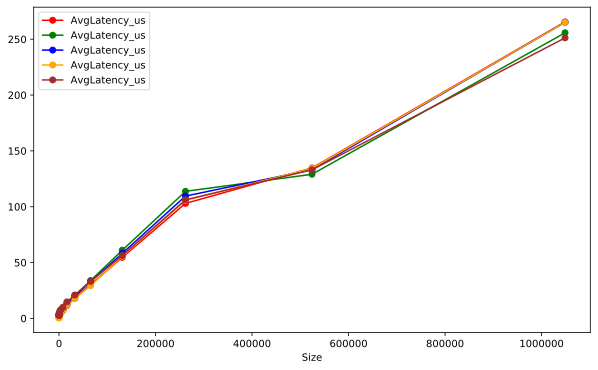

In [92]:
skl_bcast_n4_p12 = pd.read_csv("../../SpMVMicroBenchmark/mpi/Results/bcast_skylake_n4_ppn3_t12.csv")
skl_bcast_n4_p12 = skl_bcast_n4_p12.groupby("Size").mean().reset_index()

skl_bcast_n5_p13 = pd.read_csv("../../SpMVMicroBenchmark/mpi/Results/bcast_skylake_n5_ppn3_t13.csv")
skl_bcast_n5_p13 = skl_bcast_n5_p13.groupby("Size").mean().reset_index()

skl_bcast_n6_p14 = pd.read_csv("../../SpMVMicroBenchmark/mpi/Results/bcast_skylake_n6_ppn3_t14.csv")
skl_bcast_n6_p14 = skl_bcast_n6_p14.groupby("Size").mean().reset_index()

skl_bcast_n7_p15 = pd.read_csv("../../SpMVMicroBenchmark/mpi/Results/bcast_skylake_n7_ppn3_t15.csv")
skl_bcast_n7_p15 = skl_bcast_n7_p15.groupby("Size").mean().reset_index()

skl_bcast_n8_p16 = pd.read_csv("../../SpMVMicroBenchmark/mpi/Results/bcast_skylake_n8_ppn2_t16.csv")
skl_bcast_n8_p16 = skl_bcast_n8_p16.groupby("Size").mean().reset_index()
size_list = skl_bcast_n8_p16["Size"]

_node= []
_p = []
_lat = []
_s = []
_ppn = []
for msg_s in size_list:
    #     Node:4 and process:12
    _s.append(msg_s)
    _node.append(4)
    _p.append(12)
    _ppn.append(3)
    _lat.append(skl_bcast_n4_p12[skl_bcast_n4_p12["Size"] == msg_s].reset_index()["AvgLatency_us"].iloc[0])

    #     Node:5 and process:13
    _s.append(msg_s)
    _node.append(5)
    _p.append(13)
    _ppn.append(3)
    _lat.append(skl_bcast_n5_p13[skl_bcast_n5_p13["Size"] == msg_s].reset_index()["AvgLatency_us"].iloc[0])
    
    #     Node:4 and process:12
    _s.append(msg_s)
    _node.append(6)
    _p.append(14)
    _ppn.append(3)
    _lat.append(skl_bcast_n6_p14[skl_bcast_n6_p14["Size"] == msg_s].reset_index()["AvgLatency_us"].iloc[0])
    
    #     Node:4 and process:12
    _s.append(msg_s)
    _node.append(7)
    _p.append(15)
    _ppn.append(3)
    _lat.append(skl_bcast_n7_p15[skl_bcast_n7_p15["Size"] == msg_s].reset_index()["AvgLatency_us"].iloc[0])
    
    #     Node:4 and process:12
    _s.append(msg_s)
    _node.append(8)
    _p.append(16)
    _ppn.append(2)
    _lat.append(skl_bcast_n8_p16[skl_bcast_n8_p16["Size"] == msg_s].reset_index()["AvgLatency_us"].iloc[0])
skl_bcast_data = pd.DataFrame()
skl_bcast_data["Size"] = _s
skl_bcast_data["Nodes"] = _node
skl_bcast_data["Process"] = _p
skl_bcast_data["PPN"] = _ppn
skl_bcast_data["Latency_us"] = _lat
ax1 = skl_bcast_n4_p12.plot(kind="line", x="Size", color="r", y="AvgLatency_us", style="-o", figsize=(10,6))
skl_bcast_n5_p13.plot(kind="line", ax=ax1, x="Size", color="g", y="AvgLatency_us", style="-o", figsize=(10,6))
skl_bcast_n6_p14.plot(kind="line", ax=ax1, x="Size", color="b", y="AvgLatency_us", style="-o", figsize=(10,6))
skl_bcast_n7_p15.plot(kind="line", ax=ax1, x="Size", color="orange", y="AvgLatency_us", style="-o", figsize=(10,6))
skl_bcast_n8_p16.plot(kind="line", ax=ax1, x="Size", color="brown", y="AvgLatency_us", style="-o", figsize=(10,6))
skl_bcast_data

# Cache Friendliness

In [93]:
cache_data = pd.read_csv("../../ShMemGraph/src/util/Results/CACHE_FRIENDLINESS.csv")
cache_data = cache_data.groupby(["FileName", "Process", "Rank", "DataType", "CacheType", "Architecture"]).mean().reset_index()
kway_cache_data = cache_data[cache_data["FileName"].isin(test_matrices)].reset_index(drop=True)
random_cache_data = cache_data[cache_data["FileName"].isin(random_test_matrices)].reset_index(drop=True)
kway_L3_data = kway_cache_data[(kway_cache_data["CacheType"] == "L3") & (kway_cache_data["Architecture"] == "Skylake")]
rand_L3_data = random_cache_data[(random_cache_data["CacheType"] == "L3") & (random_cache_data["Architecture"] == "Skylake")]

TestMatL3Cache = pd.DataFrame()
_mat = []
_p = []
_miss = []
_hit = []
_rpn = []
_nnnzpn = []
_avg_row = []
_avg_nnz = []
_access = []
for p,p_data in rand_L3_data.groupby(["Process"]):
    for f,data in p_data.groupby(["FileName"]):
        ppn = 36
        data = data.reset_index()
        prcs = p
        node = int(prcs/ppn)
        if len(data) < ppn:
            print("******* ", f, " does not has sufficient data for process: ", p, " *******")
            continue
        _mat.append(random_to_org_map[f])
        _avg_nnz.append(data["NNZ"].mean())
        _avg_row.append(data["Vtx"].mean())
        _p.append(p)
        prcs = ppn*node
        if prcs > len(data):
            print(f, " not fully done! [found", len(data), "of", prcs, "] for process: ", p)
            node = int(len(data)/ppn)
            prcs = node*ppn
            print("Node count: ", node, " process count: ", prcs)
        data = data.iloc[0:prcs]
        nnz = int(data["NNZ"].sum()/node)

        avg_cache_miss = data["CacheMiss"].sum()
        avg_cache_hit = data["CacheHit"].sum()

        avg_cache_miss = avg_cache_miss/node
        avg_cache_hit = avg_cache_hit/node

        _nnnzpn.append(data["NNZ"].sum()/node)
        _rpn.append(data["Vtx"].sum()/node)
        _miss.append(avg_cache_miss)
        _hit.append(avg_cache_hit)
        _access.append(avg_cache_miss + avg_cache_hit)
    
#     print("Node: ", node, " Process: ", prcs)
#     print(f, ": NNZ: ", nnz, " Avg Cache Miss: ", '{:,.3f}'.format(avg_cache_miss), " Avg Cache Hit: ", '{:,.3f}'.format(avg_cache_hit), " Access: ", int(avg_cache_miss+avg_cache_hit))
TestMatL3Cache["Matrices"] = _mat
TestMatL3Cache["Process"] = _p
TestMatL3Cache["AvgRows"] = _avg_row
TestMatL3Cache["AvgNNZ"] = _avg_nnz
TestMatL3Cache["RowsPerNode"] = _rpn
TestMatL3Cache["NNZPerNode"] = _nnnzpn
TestMatL3Cache["CacheMissPerNode"] = _miss
TestMatL3Cache["CacheHitPerNode"] = _hit
TestMatL3Cache["CacheAccessPerNode"] = _access
TestMatL3Cache


TestKwayMatL3Cache = pd.DataFrame()
_mat = []
_p = []
_miss = []
_hit = []
_rpn = []
_nnnzpn = []
_avg_row = []
_avg_nnz = []
_access = []
for p,p_data in kway_L3_data.groupby(["Process"]):
    for f,data in p_data.groupby(["FileName"]):
        ppn = 36
        data = data.reset_index()
        prcs = p
        node = int(prcs/ppn)
        if len(data) < ppn:
            print("******* ", f, " does not has sufficient kway data for process: ", p, " *******")
            continue
        _mat.append(f)
        _avg_nnz.append(data["NNZ"].mean())
        _avg_row.append(data["Vtx"].mean())
        _p.append(p)
        prcs = ppn*node
        if prcs > len(data):
            print(f, " not fully done! [found", len(data), "of", prcs, "] for process: ", p)
            node = int(len(data)/ppn)
            prcs = node*ppn
            print("Node count: ", node, " process count: ", prcs)
        data = data.iloc[0:prcs]
        nnz = int(data["NNZ"].sum()/node)

        avg_cache_miss = data["CacheMiss"].sum()
        avg_cache_hit = data["CacheHit"].sum()

        avg_cache_miss = avg_cache_miss/node
        avg_cache_hit = avg_cache_hit/node

        _nnnzpn.append(data["NNZ"].sum()/node)
        _rpn.append(data["Vtx"].sum()/node)
        _miss.append(avg_cache_miss)
        _hit.append(avg_cache_hit)
        _access.append(avg_cache_miss + avg_cache_hit)
    
#     print("Node: ", node, " Process: ", prcs)
#     print(f, ": NNZ: ", nnz, " Avg Cache Miss: ", '{:,.3f}'.format(avg_cache_miss), " Avg Cache Hit: ", '{:,.3f}'.format(avg_cache_hit), " Access: ", int(avg_cache_miss+avg_cache_hit))
TestKwayMatL3Cache["Matrices"] = _mat
TestKwayMatL3Cache["Process"] = _p
TestKwayMatL3Cache["AvgRows"] = _avg_row
TestKwayMatL3Cache["AvgNNZ"] = _avg_nnz
TestKwayMatL3Cache["RowsPerNode"] = _rpn
TestKwayMatL3Cache["NNZPerNode"] = _nnnzpn
TestKwayMatL3Cache["CacheMissPerNode"] = _miss
TestKwayMatL3Cache["CacheHitPerNode"] = _hit
TestKwayMatL3Cache["CacheAccessPerNode"] = _access
TestKwayMatL3Cache


,Matrices,Process,AvgRows,AvgNNZ,RowsPerNode,NNZPerNode,CacheMissPerNode,CacheHitPerNode,CacheAccessPerNode
0,333SP,144,25783.437500,1.542866e+05,9.282038e+05,5.554316e+06,6.905425e+04,5.485262e+06,5.554316e+06
1,AS365,144,26383.854167,1.578899e+05,9.498188e+05,5.684038e+06,7.517325e+04,5.608865e+06,5.684038e+06
2,M6,144,24317.888889,1.458602e+05,8.754440e+05,5.250968e+06,7.053250e+04,5.180436e+06,5.250968e+06
3,NLR,144,28915.020833,1.734441e+05,1.040941e+06,6.243988e+06,8.256700e+04,6.161421e+06,6.243988e+06
4,hugetrace-00010,144,83732.229167,2.511414e+05,3.014360e+06,9.041090e+06,2.070382e+05,8.834051e+06,9.041090e+06
5,road_central,144,97790.388889,2.351863e+05,3.520454e+06,8.466706e+06,2.244688e+05,8.242238e+06,8.466706e+06
6,road_usa,144,166301.020833,4.007543e+05,5.986837e+06,1.442716e+07,3.784668e+05,1.404869e+07,1.442716e+07
7,333SP,169,21969.319527,1.314631e+05,7.926078e+05,4.740976e+06,5.932675e+04,4.681649e+06,4.740976e+06
8,AS365,169,22480.917160,1.345334e+05,8.099950e+05,4.850331e+06,6.552025e+04,4.784810e+06,4.850331e+06
9,M6,169,20720.568047,1.242833e+05,7.458615e+05,4.473610e+06,6.138500e+04,4.412225e+06,4.473610e+06


# Memory Access Model on Skylake(Single Precision)

# Prepare CSR 2D SpMV Data

In [104]:
csr_2d_spmv = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_CSR_2D_SpMV.csv")
csr_2d_spmv = csr_2d_spmv[~csr_2d_spmv['Name'].str.contains("rmat")].reset_index(drop=True)
csr_2d_ref = csr_2d_spmv[["Name", "Nodes", "nProcess", "DataType", "AvgRow", "NNZ", "NonZeroPerRow", "AvgNPRSD", "AvgTime", "AvgBcastTime", "AvgMatmulTime", "AvgReduceTime"]]
csr_2d_ref = csr_2d_ref.groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index().sort_values(by=["Name", "Nodes", "nProcess", "DataType"]).reset_index(drop=True)
csr_2d_test = pd.DataFrame()
csr_2d_test["Name"] = csr_2d_ref["Name"]
csr_2d_test["Nodes"] = csr_2d_ref["Nodes"]
csr_2d_test["nProcess"] = csr_2d_ref["nProcess"]
csr_2d_test["AvgRow"] = csr_2d_ref["AvgRow"]
csr_2d_test["NonZeroPerRow"] = csr_2d_ref["NonZeroPerRow"]
csr_2d_test["NNZ"] = csr_2d_ref["NNZ"]
csr_2d_test["AvgTime"] = csr_2d_ref["AvgTime"]/1000
csr_2d_test["AvgBcastTime"] = csr_2d_ref["AvgBcastTime"]/1000
csr_2d_test["AvgMatmulTime"] = csr_2d_ref["AvgMatmulTime"]/1000
csr_2d_test["AvgReduceTime"] = csr_2d_ref["AvgReduceTime"]/1000
csr_2d_test["Size"] = 36*((12*csr_2d_ref["AvgRow"]) + (8*csr_2d_ref["NNZ"])) 
csr_2d_test["BcastSize"] = 4*csr_2d_ref["AvgRow"]
csr_2d_test["ReduceSize"] = 4*csr_2d_ref["AvgRow"]
csr_2d_test = csr_2d_test[csr_2d_test["Size"] >= 100000000].reset_index(drop=True).sort_values(by="AvgRow").reset_index(drop=True)
VEC_WIDTH = 4
FLOPS_PER_CAL = 2
FLOP_PER_SEC = 42.84
csr_2d_test["TimeForFLOPS"] = (1.0e-9 * csr_2d_test["NNZ"] * VEC_WIDTH * FLOPS_PER_CAL)/FLOP_PER_SEC
csr_2d_test = csr_2d_test[csr_2d_test["Name"].isin(test_matrices)].reset_index(drop=True)

_miss = []
_hit = []
_access = []

for i,r in csr_2d_test.iterrows():
    cache_data = TestMatL3Cache[(TestMatL3Cache["Matrices"] == r["Name"]) & (TestMatL3Cache["Process"] == r["nProcess"])].reset_index(drop=True)
    if cache_data.shape[0] <= 0:
        print("Cache data not available for ", r["Name"], r["nProcess"])
        _miss.append(0)
        _hit.append(0)
        _access.append(0)
        continue
    _miss.append(cache_data["CacheMissPerNode"].iloc[0]*4)
    _hit.append(cache_data["CacheHitPerNode"].iloc[0]*4)
    _access.append(cache_data["CacheAccessPerNode"].iloc[0]*4)
csr_2d_test["CacheMissPerNode"] = _miss
csr_2d_test["CacheHitPerNode"] = _hit
csr_2d_test["CacheAccessPerNode"] = _access

csr_2d_test["SeqSize"] = csr_2d_test["Size"] + csr_2d_test["CacheHitPerNode"]
csr_2d_test["RandomSize"] = csr_2d_test["CacheMissPerNode"]
csr_2d_test

,Name,Nodes,nProcess,AvgRow,NonZeroPerRow,NNZ,AvgTime,AvgBcastTime,AvgMatmulTime,AvgReduceTime,Size,BcastSize,ReduceSize,TimeForFLOPS,CacheMissPerNode,CacheHitPerNode,CacheAccessPerNode,SeqSize,RandomSize
0,M6,8,256,218861,0.374879,82046,0.003967,0.000958,0.001573,0.001435,118177200,875444,875444,0.000015,3.134678e+06,8.680141e+06,1.181482e+07,1.268573e+08,3.134678e+06
1,333SP,8,256,232051,0.373996,86786,0.004235,0.001019,0.001692,0.001525,125240400,928204,928204,0.000016,3.749885e+06,8.747425e+06,1.249731e+07,1.339878e+08,3.749885e+06
2,M6,7,225,233452,0.399870,93350,0.004356,0.001021,0.001761,0.001573,127736064,933808,933808,0.000017,4.015929e+06,9.426485e+06,1.344241e+07,1.371625e+08,4.015929e+06
3,AS365,8,256,237455,0.374021,88813,0.004371,0.001043,0.001738,0.001590,128158704,949820,949820,0.000017,4.006044e+06,8.783337e+06,1.278938e+07,1.369420e+08,4.006044e+06
4,333SP,7,225,247521,0.398929,98743,0.004739,0.001087,0.001894,0.001759,135367056,990084,990084,0.000018,4.743762e+06,9.475434e+06,1.421920e+07,1.448425e+08,4.743762e+06
5,AS365,7,225,253285,0.398956,101049,0.004683,0.001113,0.001949,0.001620,138521232,1013140,1013140,0.000019,5.046069e+06,9.504933e+06,1.455100e+07,1.480262e+08,5.046069e+06
6,NLR,8,256,260236,0.374899,97562,0.004813,0.001150,0.001960,0.001703,140519808,1040944,1040944,0.000018,5.134838e+06,8.913890e+06,1.404873e+07,1.494337e+08,5.134838e+06
7,M6,5,169,269368,0.461388,124283,0.005272,0.001066,0.002478,0.001727,152160480,1077472,1077472,0.000023,6.712645e+06,1.118448e+07,1.789713e+07,1.633450e+08,6.712645e+06
8,NLR,7,225,277585,0.399893,111004,0.005410,0.001224,0.002416,0.001770,151885872,1110340,1110340,0.000021,6.361668e+06,9.623634e+06,1.598530e+07,1.615095e+08,6.361668e+06
9,333SP,5,169,285602,0.460302,131463,0.005701,0.001134,0.002751,0.001816,161241408,1142408,1142408,0.000025,7.721183e+06,1.120866e+07,1.892984e+07,1.724501e+08,7.721183e+06


# Predict CSR 2D SpMV model Based on STREAM 

In [105]:
skylake_res = pd.read_csv("../../STREAM/Results/SKYLAKE.csv")

dp_copy = skylake_res[(skylake_res["Operation"] == "Copy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
dp_copy = dp_copy[dp_copy["Size"] >= 1000000000]
dp_copy = dp_copy.groupby("Size").mean().reset_index().sort_values(by="Size").reset_index()


dp_random_copy = skylake_res[(skylake_res["Operation"] == "RandomCopy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
dp_random_copy = dp_random_copy[dp_random_copy["Size"] >= 1000000000]
dp_random_copy = dp_random_copy.groupby("Size").mean().reset_index().sort_values(by="Size").reset_index()


_bandwidth = dp_copy["Bandwidth_MBS"].mean() * 1.0E06
_random_bandwidth = dp_random_copy["Bandwidth_MBS"].mean() * 1.0E06

csr_2d_matmul_pred = csr_2d_test
csr_2d_matmul_pred["SeqLatency"] = csr_2d_test["SeqSize"] /(_bandwidth)
csr_2d_matmul_pred["RandomLatency"] = csr_2d_test["RandomSize"] /(_random_bandwidth)
csr_2d_matmul_pred["PredictedTime"] = csr_2d_test["SeqLatency"] + csr_2d_test["RandomLatency"]
csr_2d_matmul_pred["Error"] = ((csr_2d_test["AvgMatmulTime"] - csr_2d_test["PredictedTime"])/csr_2d_test["AvgMatmulTime"])*100
csr_2d_matmul_pred = csr_2d_test.sort_values(by=["Name", "nProcess"]).reset_index(drop=True)
csr_2d_test[["Name", "Nodes", "nProcess", "NonZeroPerRow", "AvgMatmulTime", "PredictedTime", "Error"]]
for i,r in csr_2d_matmul_pred.iterrows():
    print(r["Name"], " & ", r["Nodes"], " & ", r["nProcess"], " & ", '{0:,.2E}'.format(r["AvgMatmulTime"]), " & ", '{0:,.2E}'.format(r["PredictedTime"]), " & ", '{0:,.1f}'.format(abs(r["Error"])), " \\\\ \hline")
    
print("Max error: ", abs(csr_2d_matmul_pred["Error"]).max(), " Avg Error: ", abs(csr_2d_matmul_pred["Error"]).mean())

333SP  &  4  &  144  &  3.20E-03  &  3.76E-03  &  17.5  \\ \hline
333SP  &  5  &  169  &  2.75E-03  &  3.10E-03  &  12.7  \\ \hline
333SP  &  7  &  225  &  1.89E-03  &  2.20E-03  &  16.1  \\ \hline
333SP  &  8  &  256  &  1.69E-03  &  1.88E-03  &  11.4  \\ \hline
AS365  &  4  &  144  &  3.29E-03  &  3.91E-03  &  18.9  \\ \hline
AS365  &  5  &  169  &  2.83E-03  &  3.23E-03  &  14.0  \\ \hline
AS365  &  7  &  225  &  1.95E-03  &  2.29E-03  &  17.6  \\ \hline
AS365  &  8  &  256  &  1.74E-03  &  1.97E-03  &  13.1  \\ \hline
M6  &  4  &  144  &  2.98E-03  &  3.40E-03  &  14.2  \\ \hline
M6  &  5  &  169  &  2.48E-03  &  2.80E-03  &  12.9  \\ \hline
M6  &  7  &  225  &  1.76E-03  &  1.97E-03  &  11.9  \\ \hline
M6  &  8  &  256  &  1.57E-03  &  1.69E-03  &  7.2  \\ \hline
NLR  &  4  &  144  &  3.67E-03  &  4.54E-03  &  23.6  \\ \hline
NLR  &  5  &  169  &  3.18E-03  &  3.77E-03  &  18.5  \\ \hline
NLR  &  7  &  225  &  2.42E-03  &  2.70E-03  &  11.8  \\ \hline
NLR  &  8  &  256  &  1.96E-0

# MPI Communication

In [106]:
def _train_model(X, y):
    scores = []
    best = 0
    best_param = {}
#     print("X: ", X)
#     print("y: ", y)
    # c=20e4
    # e=0.001
    for c in np.linspace(2e1,50e4, num=50):
        for e in np.linspace(0.0001, 0.9, 20):
            best_svr = SVR(kernel='poly', C=c, gamma='auto', degree=3, epsilon=e, coef0=1)
            cv = KFold(n_splits=5, random_state=42, shuffle=True)
            for train_index, test_index in cv.split(X):
                X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
                best_svr.fit(X_train, y_train)
                scores.append(best_svr.score(X_test, np.array(y_test)))
#                 print("best: ", best, " scores: ", np.mean(scores))
                if best < np.mean(scores):
                    best = np.mean(scores)
                    best_param = {"C": c, "epsilon": e}
    print(best_param)
    return best_param

# MPI Broadcast

In [110]:
csr_2d_spmv = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_CSR_2D_SpMV.csv")
csr_2d_spmv = csr_2d_spmv[~csr_2d_spmv['Name'].str.contains("rmat")].reset_index(drop=True)
csr_2d_spmv = csr_2d_spmv.groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index().sort_values(by="Name").reset_index()

csr_2d_bcast_data = csr_2d_spmv[csr_2d_spmv["DataType"] == 4][["Name", "MatrixSize", "AvgRow", "NNZ", "NonZeroPerRow", "AvgNPRSD", "Nodes", "nProcess", "DataType", "AvgBcastTime"]].sort_values(by="AvgRow").reset_index(drop=True)
csr_2d_bcast_data = csr_2d_bcast_data.sort_values(by=["AvgRow", "NonZeroPerRow"]).reset_index(drop=True)

density = []
min_time_factor = 1.0
if min(csr_2d_bcast_data["AvgBcastTime"]) < 1.0:
    min_time_factor = 1/min(csr_2d_bcast_data["AvgBcastTime"])
for i,r in csr_2d_bcast_data.iterrows():
    csr_2d_bcast_data.at[i, "AvgBcastTime"] = min_time_factor*r["AvgBcastTime"]
    density.append(float(r["NNZ"])/float(r["AvgRow"] * r["AvgRow"]))
csr_2d_bcast_data["Density"] = density

csr_2d_train_data = csr_2d_bcast_data[~csr_2d_bcast_data["Name"].isin(test_matrices)].reset_index(drop=True)
csr_2d_test_data = csr_2d_bcast_data[csr_2d_bcast_data["Name"].isin(test_matrices)].reset_index(drop=True)

# attributes = ["AvgRow", "NNZ", "NonZeroPerRow", "AvgNPRSD", "Density", "Nodes", "nProcess"]
attributes = ["AvgRow", "NNZ", "Nodes", "nProcess"]
csr_2d_train = csr_2d_train_data[attributes].to_numpy()
csr_2d_test = csr_2d_test_data[attributes].to_numpy()
column = "AvgBcastTime"

csr_2d_X = np.concatenate((csr_2d_train, csr_2d_test), axis=0)
scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
csr_2d_X = scaler.fit_transform(csr_2d_X)
X = csr_2d_X[0:len(csr_2d_train)]
csr_2d_test_X = csr_2d_X[len(csr_2d_train):]
train_y = np.array(csr_2d_train_data[column])
test_y = np.array(csr_2d_test_data[column])

# best_param = _train_model(X, train_y)
csr_2d_bcast_best_param = {"C" : 58000, "epsilon": 0.1}
svr_model = SVR(kernel='poly', C=csr_2d_bcast_best_param['C'], gamma='auto', degree=3, epsilon=csr_2d_bcast_best_param['epsilon'], coef0=1)
svr_model.fit(X, train_y)
y_pred = svr_model.predict(csr_2d_test_X)


csr_dyn_2d_bcast_pred = pd.DataFrame()
mat = [] 
node = []
prcs = []
rows = []
nnz_r = []
a_time = []
p_time = []
err = []
spmv_model = []
m_size = []

max_err = 0
avg_err = 0
for i,row in csr_2d_test_data.iterrows():
#     print(y[index])
#     g = row["Name"].split("_")
    print(row["Name"], "&", '{0:.3E}'.format(test_y[i]/min_time_factor),"&",'{0:.3E}'.format(y_pred[i]/min_time_factor), "&", 
          '{0:,.2}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])+"\\%", "\\\ \hline")           
    
    mat.append(row["Name"])
    node.append(row["Nodes"])
    prcs.append(row["nProcess"])
    rows.append(row["AvgRow"])
    nnz_r.append(row["NonZeroPerRow"])
    a_time.append(float('{0:.3E}'.format(test_y[i]/min_time_factor)))
    p_time.append(float('{0:.3E}'.format(y_pred[i]/min_time_factor)))
    err.append(float('{0:,.2}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])))
    spmv_model.append("CSR 2D Partition")
    m_size.append(row["MatrixSize"])
csr_dyn_2d_bcast_pred["Name"] = mat
csr_dyn_2d_bcast_pred["Model"] = spmv_model
csr_dyn_2d_bcast_pred["Nodes"] = node
csr_dyn_2d_bcast_pred["Process"] = prcs
csr_dyn_2d_bcast_pred["Matrix Size"] = m_size
csr_dyn_2d_bcast_pred["Avg Row"] = rows
csr_dyn_2d_bcast_pred["Nonzero per Row"] = nnz_r
csr_dyn_2d_bcast_pred["Actual Time"] = a_time
csr_dyn_2d_bcast_pred["Predicted Time"] = p_time
csr_dyn_2d_bcast_pred["Error"] = err

print("max error: ", csr_dyn_2d_bcast_pred["Error"].max(), " avg error: ", csr_dyn_2d_bcast_pred["Error"].mean())

M6 & 9.584E-01 & 9.908E-01 & 3.4\% \\ \hline
333SP & 1.019E+00 & 1.050E+00 & 3.0\% \\ \hline
M6 & 1.021E+00 & 1.065E+00 & 4.3\% \\ \hline
AS365 & 1.043E+00 & 1.074E+00 & 2.9\% \\ \hline
333SP & 1.087E+00 & 1.127E+00 & 3.7\% \\ \hline
AS365 & 1.113E+00 & 1.152E+00 & 3.5\% \\ \hline
NLR & 1.150E+00 & 1.176E+00 & 2.3\% \\ \hline
M6 & 1.066E+00 & 1.248E+00 & 1.7e+01\% \\ \hline
NLR & 1.224E+00 & 1.259E+00 & 2.9\% \\ \hline
333SP & 1.134E+00 & 1.322E+00 & 1.6e+01\% \\ \hline
M6 & 1.613E+00 & 1.429E+00 & 1.1e+01\% \\ \hline
AS365 & 1.162E+00 & 1.352E+00 & 1.6e+01\% \\ \hline
333SP & 1.716E+00 & 1.513E+00 & 1.2e+01\% \\ \hline
AS365 & 1.752E+00 & 1.547E+00 & 1.2e+01\% \\ \hline
NLR & 1.282E+00 & 1.479E+00 & 1.5e+01\% \\ \hline
NLR & 1.924E+00 & 1.690E+00 & 1.2e+01\% \\ \hline
hugetrace-00010 & 3.423E+00 & 3.430E+00 & 0.2\% \\ \hline
hugetrace-00010 & 3.633E+00 & 3.580E+00 & 1.5\% \\ \hline
road_central & 3.998E+00 & 4.018E+00 & 0.49\% \\ \hline
hugetrace-00010 & 3.449E+00 & 4.119E+00 & 1.9e+0

# MPI Reduce

In [111]:
csr_2d_spmv = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_CSR_2D_SpMV.csv")
csr_2d_spmv = csr_2d_spmv[~csr_2d_spmv['Name'].str.contains("rmat")].reset_index(drop=True)
csr_2d_spmv = csr_2d_spmv.groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index().sort_values(by="Name").reset_index()

csr_2d_reduce_data = csr_2d_spmv[csr_2d_spmv["DataType"] == 4][["Name", "MatrixSize", "AvgRow", "NNZ", "NonZeroPerRow", "AvgNPRSD", "Nodes", "nProcess", "DataType", "AvgReduceTime"]].sort_values(by="AvgRow").reset_index(drop=True)
csr_2d_reduce_data = csr_2d_reduce_data.sort_values(by=["AvgRow", "NonZeroPerRow"]).reset_index(drop=True)

density = []
column = "AvgReduceTime"
min_time_factor = 1.0
if min(csr_2d_reduce_data[column]) < 1.0:
    min_time_factor = 1/min(csr_2d_reduce_data[column])
for i,r in csr_2d_reduce_data.iterrows():
    csr_2d_reduce_data.at[i, column] = min_time_factor*r[column]
    density.append(float(r["NNZ"])/float(r["AvgRow"] * r["AvgRow"]))
csr_2d_reduce_data["Density"] = density

csr_2d_train_data = csr_2d_reduce_data[~csr_2d_reduce_data["Name"].isin(test_matrices)].reset_index(drop=True)
csr_2d_test_data = csr_2d_reduce_data[csr_2d_reduce_data["Name"].isin(test_matrices)].reset_index(drop=True)


# attributes = ["AvgRow", "NNZ", "NonZeroPerRow", "AvgNPRSD", "Density", "Nodes", "nProcess"]
attributes = ["AvgRow", "NNZ", "Nodes", "nProcess"]
csr_2d_train = csr_2d_train_data[attributes].to_numpy()
csr_2d_test = csr_2d_test_data[attributes].to_numpy()


csr_2d_X = np.concatenate((csr_2d_train, csr_2d_test), axis=0)
scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
csr_2d_X = scaler.fit_transform(csr_2d_X)
X = csr_2d_X[0:len(csr_2d_train)]
csr_2d_test_X = csr_2d_X[len(csr_2d_train):]
train_y = np.array(csr_2d_train_data[column])
test_y = np.array(csr_2d_test_data[column])

# best_param = _train_model(X, train_y)
csr_2d_reduce_best_param = {"C" : 4000, "epsilon": 0.1}
svr_model = SVR(kernel='poly', C=csr_2d_reduce_best_param['C'], gamma='auto', degree=3, epsilon=csr_2d_reduce_best_param['epsilon'], coef0=1)
svr_model.fit(X, train_y)
y_pred = svr_model.predict(csr_2d_test_X)


csr_dyn_2d_reduce_pred = pd.DataFrame()
mat = [] 
node = []
prcs = []
rows = []
nnz_r = []
a_time = []
p_time = []
err = []
spmv_model = []
m_size = []

max_err = 0
avg_err = 0
for i,row in csr_2d_test_data.iterrows():
#     print(y[index])
#     g = row["Name"].split("_")
    print(row["Name"], "&", '{0:.3E}'.format(test_y[i]/min_time_factor),"&",'{0:.3E}'.format(y_pred[i]/min_time_factor), "&", 
          '{0:,.2}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])+"\\%", "\\\ \hline")           
    
    mat.append(row["Name"])
    node.append(row["Nodes"])
    prcs.append(row["nProcess"])
    rows.append(row["AvgRow"])
    nnz_r.append(row["NonZeroPerRow"])
    a_time.append(float('{0:.3E}'.format(test_y[i]/min_time_factor)))
    p_time.append(float('{0:.3E}'.format(y_pred[i]/min_time_factor)))
    err.append(float('{0:,.2}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])))
    spmv_model.append("CSR 2D Partition")
    m_size.append(row["MatrixSize"])
csr_dyn_2d_reduce_pred["Name"] = mat
csr_dyn_2d_reduce_pred["Model"] = spmv_model
csr_dyn_2d_reduce_pred["Nodes"] = node
csr_dyn_2d_reduce_pred["Process"] = prcs
csr_dyn_2d_reduce_pred["Matrix Size"] = m_size
csr_dyn_2d_reduce_pred["Avg Row"] = rows
csr_dyn_2d_reduce_pred["Nonzero per Row"] = nnz_r
csr_dyn_2d_reduce_pred["Actual Time"] = a_time
csr_dyn_2d_reduce_pred["Predicted Time"] = p_time
csr_dyn_2d_reduce_pred["Error"] = err

print("max error: ", csr_dyn_2d_reduce_pred["Error"].max(), " avg error: ", csr_dyn_2d_reduce_pred["Error"].mean())

M6 & 1.435E+00 & 1.474E+00 & 2.7\% \\ \hline
333SP & 1.525E+00 & 1.560E+00 & 2.3\% \\ \hline
M6 & 1.573E+00 & 1.730E+00 & 9.9\% \\ \hline
AS365 & 1.590E+00 & 1.596E+00 & 0.36\% \\ \hline
333SP & 1.759E+00 & 1.829E+00 & 4.0\% \\ \hline
AS365 & 1.620E+00 & 1.870E+00 & 1.5e+01\% \\ \hline
NLR & 1.703E+00 & 1.746E+00 & 2.5\% \\ \hline
M6 & 1.727E+00 & 2.020E+00 & 1.7e+01\% \\ \hline
NLR & 1.770E+00 & 2.042E+00 & 1.5e+01\% \\ \hline
333SP & 1.816E+00 & 2.138E+00 & 1.8e+01\% \\ \hline
M6 & 2.185E+00 & 2.129E+00 & 2.6\% \\ \hline
AS365 & 1.850E+00 & 2.186E+00 & 1.8e+01\% \\ \hline
333SP & 2.314E+00 & 2.251E+00 & 2.7\% \\ \hline
AS365 & 2.372E+00 & 2.302E+00 & 3.0\% \\ \hline
NLR & 2.017E+00 & 2.390E+00 & 1.8e+01\% \\ \hline
NLR & 2.626E+00 & 2.513E+00 & 4.3\% \\ \hline
hugetrace-00010 & 4.538E+00 & 4.848E+00 & 6.8\% \\ \hline
hugetrace-00010 & 6.653E+00 & 5.577E+00 & 1.6e+01\% \\ \hline
road_central & 5.266E+00 & 5.617E+00 & 6.7\% \\ \hline
hugetrace-00010 & 7.881E+00 & 6.576E+00 & 1.7e+01\% 

In [126]:
csr_2d_matmul_pred = csr_2d_matmul_pred.sort_values(by=["Name", "Nodes", "nProcess"]).reset_index(drop=True)
csr_dyn_2d_bcast_pred = csr_dyn_2d_bcast_pred.sort_values(by=["Name", "Nodes", "Process"]).reset_index(drop=True)
csr_dyn_2d_reduce_pred = csr_dyn_2d_reduce_pred.sort_values(by=["Name", "Nodes", "Process"]).reset_index(drop=True)
csr_2d_matmul_pred["BcastPredictedTime"] = csr_dyn_2d_bcast_pred["Predicted Time"]/1000
csr_2d_matmul_pred["ReducePredictedTime"] = csr_dyn_2d_reduce_pred["Predicted Time"]/1000
csr_2d_matmul_pred["TotalPredictedTime"] = csr_2d_matmul_pred["PredictedTime"] + csr_2d_matmul_pred["BcastPredictedTime"] + csr_2d_matmul_pred["ReducePredictedTime"]
csr_2d_matmul_pred["TotalError"] = abs(csr_2d_matmul_pred["TotalPredictedTime"] - csr_2d_matmul_pred["AvgTime"])/csr_2d_matmul_pred["AvgTime"]*100
for i,r in csr_2d_matmul_pred.iterrows():
    print(r["Name"], " & ", r["Nodes"], " & ", r["nProcess"], " & ", '{0:,.1E}'.format(r["AvgTime"]), " & ", '{0:,.1E}'.format(r["TotalPredictedTime"]), " & ", '{0:,.1f}'.format(r["TotalError"])+"\% \\\\ \hline")
    
print("Max Error: ", csr_2d_matmul_pred["TotalError"].max(), " Avg Error: ", csr_2d_matmul_pred["TotalError"].mean())  


333SP  &  4  &  144  &  7.2E-03  &  7.5E-03  &  4.1\% \\ \hline
333SP  &  5  &  169  &  5.7E-03  &  6.6E-03  &  15.1\% \\ \hline
333SP  &  7  &  225  &  4.7E-03  &  5.2E-03  &  8.8\% \\ \hline
333SP  &  8  &  256  &  4.2E-03  &  4.5E-03  &  6.1\% \\ \hline
AS365  &  4  &  144  &  7.4E-03  &  7.8E-03  &  4.7\% \\ \hline
AS365  &  5  &  169  &  5.8E-03  &  6.8E-03  &  15.8\% \\ \hline
AS365  &  7  &  225  &  4.7E-03  &  5.3E-03  &  13.5\% \\ \hline
AS365  &  8  &  256  &  4.4E-03  &  4.6E-03  &  6.1\% \\ \hline
M6  &  4  &  144  &  6.8E-03  &  7.0E-03  &  2.7\% \\ \hline
M6  &  5  &  169  &  5.3E-03  &  6.1E-03  &  15.0\% \\ \hline
M6  &  7  &  225  &  4.4E-03  &  4.8E-03  &  9.4\% \\ \hline
M6  &  8  &  256  &  4.0E-03  &  4.2E-03  &  4.7\% \\ \hline
NLR  &  4  &  144  &  8.2E-03  &  8.7E-03  &  6.3\% \\ \hline
NLR  &  5  &  169  &  6.5E-03  &  7.6E-03  &  17.8\% \\ \hline
NLR  &  7  &  225  &  5.4E-03  &  6.0E-03  &  10.9\% \\ \hline
NLR  &  8  &  256  &  4.8E-03  &  5.2E-03  &  9.0\% 

# Prepare CSR Global 1D-Kway SpMV Data

In [593]:
csr_gk_spmv = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_KWAY_SpMV.csv")
csr_gk_spmv = csr_gk_spmv[~csr_gk_spmv['Name'].str.contains("rmat")].reset_index(drop=True)
csr_gk_ref = csr_gk_spmv[["Name", "Nodes", "nProcess", "DataType", "AvgRows", "AvgNNZ", "AvgNPR", "AvgNPRSD", "AvgTime", "AvgGatherTime", "AvgMatmulTime"]]
csr_gk_ref = csr_gk_ref.groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index().sort_values(by=["Name", "Nodes", "nProcess", "DataType"]).reset_index(drop=True)
csr_gk_test = pd.DataFrame()
csr_gk_test["Name"] = csr_gk_ref["Name"]
csr_gk_test["Nodes"] = csr_gk_ref["Nodes"]
csr_gk_test["nProcess"] = csr_gk_ref["nProcess"]
csr_gk_test["AvgRow"] = csr_gk_ref["AvgRows"]
csr_gk_test["NonZeroPerRow"] = csr_gk_ref["AvgNPR"]
csr_gk_test["NNZ"] = csr_gk_ref["AvgNNZ"]
csr_gk_test["Size"] = 36*((12*csr_gk_ref["AvgRows"]) + (8*csr_gk_ref["AvgNNZ"]))
csr_gk_test["AvgTime"] = csr_gk_ref["AvgTime"]/1000
csr_gk_test["AvgGatherTime"] = csr_gk_ref["AvgGatherTime"]/1000
csr_gk_test["AvgMatmulTime"] = csr_gk_ref["AvgMatmulTime"]/1000
# csr_gk_test = csr_gk_test[csr_gk_test["Size"] >= 100000000].reset_index(drop=True).sort_values(by="AvgRow").reset_index(drop=True)
VEC_WIDTH = 4
FLOPS_PER_CAL = 2
FLOP_PER_SEC = 42.84
csr_gk_test["TimeForFLOPS"] = (1.0e-9 * csr_2d_test["NNZ"] * VEC_WIDTH * FLOPS_PER_CAL)/FLOP_PER_SEC
csr_gk_test = csr_gk_test[csr_gk_test["Name"].isin(test_matrices)].reset_index(drop=True)

                                                                               
_miss = []
_hit = []
_access = []

for i,r in csr_gk_test.iterrows():
    cache_data = TestKwayMatL3Cache[(TestKwayMatL3Cache["Matrices"] == r["Name"]) & (TestKwayMatL3Cache["Process"] == r["nProcess"])].reset_index(drop=True)
    if cache_data.shape[0] <= 0:
        print("Cache data not available for ", r["Name"], r["nProcess"])
        _miss.append(0)
        _hit.append(0)
        _access.append(0)
        continue
    _miss.append(cache_data["CacheMissPerNode"].iloc[0]*4)
    _hit.append(cache_data["CacheHitPerNode"].iloc[0]*4)
    _access.append(cache_data["CacheAccessPerNode"].iloc[0]*4)
csr_gk_test["CacheMissPerNode"] = _miss
csr_gk_test["CacheHitPerNode"] = _hit
csr_gk_test["CacheAccessPerNode"] = _access

csr_gk_test["SeqSize"] = csr_2d_test["Size"] + csr_2d_test["CacheHitPerNode"]
csr_gk_test["RandomSize"] = csr_2d_test["CacheMissPerNode"]
                                                                               
csr_gk_test



,Name,Nodes,nProcess,AvgRow,NonZeroPerRow,NNZ,Size,AvgTime,AvgGatherTime,AvgMatmulTime,TimeForFLOPS,CacheMissPerNode,CacheHitPerNode,CacheAccessPerNode,SeqSize,RandomSize
0,333SP,4,144,25783,5.98414,154286,55572624,0.026168,0.025730,0.000438,0.000029,2.762170e+05,2.194105e+07,2.221727e+07,1.903558e+08,9.957479e+06
1,333SP,5,169,21969,5.98414,131463,47351952,0.019998,0.019657,0.000340,0.000025,2.373070e+05,1.872660e+07,1.896390e+07,1.724501e+08,7.721183e+06
2,333SP,7,225,16501,5.98415,98743,35566416,0.019463,0.019211,0.000251,0.000018,1.867767e+05,1.401988e+07,1.420666e+07,1.448425e+08,4.743762e+06
3,333SP,8,256,14503,5.98397,86786,31259664,0.023632,0.023405,0.000227,0.000016,1.663651e+05,1.233077e+07,1.249713e+07,1.339878e+08,3.749885e+06
4,AS365,4,144,26383,5.98399,157889,56869488,0.026738,0.026283,0.000456,0.000027,3.006930e+05,2.243546e+07,2.273615e+07,1.945290e+08,1.045336e+07
5,AS365,5,169,22480,5.98398,134533,48456864,0.020554,0.020198,0.000356,0.000023,2.620810e+05,1.913924e+07,1.940132e+07,1.762286e+08,8.143538e+06
6,AS365,7,225,16885,5.98395,101049,36396432,0.019748,0.019490,0.000258,0.000017,2.030273e+05,1.434921e+07,1.455223e+07,1.480262e+08,5.046069e+06
7,AS365,8,256,14840,5.98406,88813,31989024,0.024177,0.023936,0.000241,0.000015,1.816051e+05,1.260587e+07,1.278747e+07,1.369420e+08,4.006044e+06
8,M6,4,144,24317,5.99808,145860,52512624,0.024721,0.024296,0.000424,0.000044,2.821300e+05,2.072174e+07,2.100387e+07,1.803157e+08,8.759911e+06
9,M6,5,169,20720,5.99808,124283,44744544,0.019067,0.018735,0.000332,0.000037,2.455400e+05,1.764890e+07,1.789444e+07,1.633450e+08,6.712645e+06


In [584]:
csr_gk_ref.keys()

Index(['Name', 'Nodes', 'nProcess', 'DataType', 'AvgRows', 'AvgNNZ', 'AvgNPR',
       'AvgNPRSD', 'AvgTime', 'AvgGatherTime', 'AvgMatmulTime'],
      dtype='object')